# State Machine Diagrams from STMPY via Graphviz

STMPY can automatically generate state machine diagrams, using the Graphviz program. To make it work, do the following:

1. Install Graphviz from https://www.graphviz.org
2. Install the Python support library via `pip install graphviz`

The cell below builds a state machine in STMPY, then gets the Graphviz source code for a graph (in the `dot` format) and then prints it in the notebook.

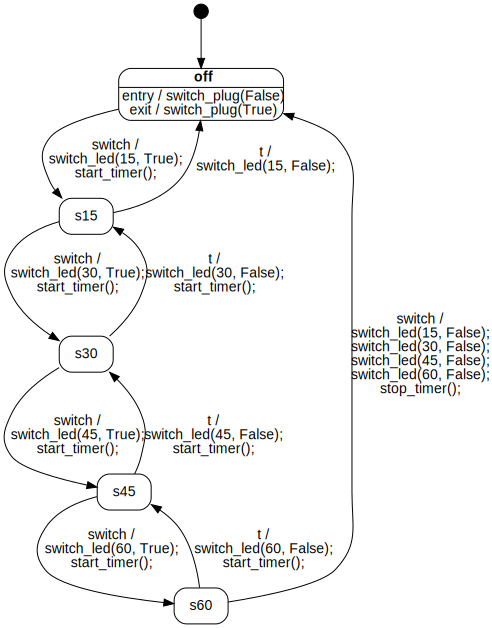

In [1]:
from graphviz import Source

from stmpy import Machine
import stmpy

t0 = {'source': 'initial',
      'target': 'off'}

t1 = {'trigger': 'switch',
       'source': 'off',
       'target': 's15',
       'effect': 'switch_led("15", True); start_timer'}

t2 = {'trigger': 'switch',
       'source': 's15',
       'target': 's30',
       'effect': 'switch_led("30", True); start_timer'}

t3 = {'trigger': 'switch',
       'source': 's30',
       'target': 's45',
       'effect': 'switch_led("45", True); start_timer'}

t4 = {'trigger': 'switch',
       'source': 's45',
       'target': 's60',
       'effect': 'switch_led("60", True); start_timer'}

t5 = {'trigger': 'switch',
       'source': 's60',
       'target': 'off',
       'effect': 'switch_led("15", False); switch_led("30", False); switch_led("45", False); switch_led("60", False); stop_timer'}

t6 = {'trigger': 't',
       'source': 's60',
       'target': 's45',
       'effect': 'switch_led("60", False); start_timer'}

t7 = {'trigger': 't',
       'source': 's45',
       'target': 's30',
       'effect': 'switch_led("45", False); start_timer'}

t8 = {'trigger': 't',
       'source': 's30',
       'target': 's15',
       'effect': 'switch_led("30", False); start_timer'}

t9 = {'trigger': 't',
       'source': 's15',
       'target': 'off',
       'effect': 'switch_led("15", False)'}

off = {'name': 'off',
      'entry': 'switch_plug(False)',
       'exit': 'switch_plug(True)'}

stm_kitchen = Machine(name='stm_kitchen', transitions=[t0, t1, t2, t3, t4, t5, t6, t7, t8, t9], obj=None, states=[off])

dot = stmpy.get_graphviz_dot(stm_kitchen)
src = Source(dot)
src

In [ ]:
with open("graph.gv", "w") as file:
    print(stmpy.get_graphviz_dot(stm_kitchen), file=file)